<a href="https://colab.research.google.com/github/BiancadeFrancisco/Clusterizacao_RFM/blob/main/C%C3%B3pia_de_DESAFIO_7_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/data (1).csv', encoding='ISO-8859-1', sep=',')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# DESCRIÇÃO FEATURES:

# InvoiceNo: Identificação da transação - int
# StockCode:Cód estoque produto - str
# Description: Descrição produto - Str
# Quantity: qtd produtos por transação - int
# InvoiceDate: Data da transação - datetime
# UnitPrice: Preço unitário do produto - float
# CustomerID: Identificação do cliente - int
# Country: País de origem da transação - Str

In [ ]:
df.shape

(541909, 8)

In [ ]:
# INFORMAÇÕES :

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# AJUSTAR NOME COLUNAS:

df.rename(columns={
    'InvoiceNo': 'id_venda',
    'StockCode': 'cod_estoque',
    'Description': 'descricao_produto',
    'Quantity': 'qtd_produto',
    'InvoiceDate': 'data_venda',
    'UnitPrice': 'preco_unit',
    'CustomerID': 'id_cliente',
    'Country': 'pais_venda'
}, inplace=True)

In [ ]:
# NULOS:

df.isnull().sum()

id_venda                  0
cod_estoque               0
descricao_produto      1454
qtd_produto               0
data_venda                0
preco_unit                0
id_cliente           135080
pais_venda                0
dtype: int64

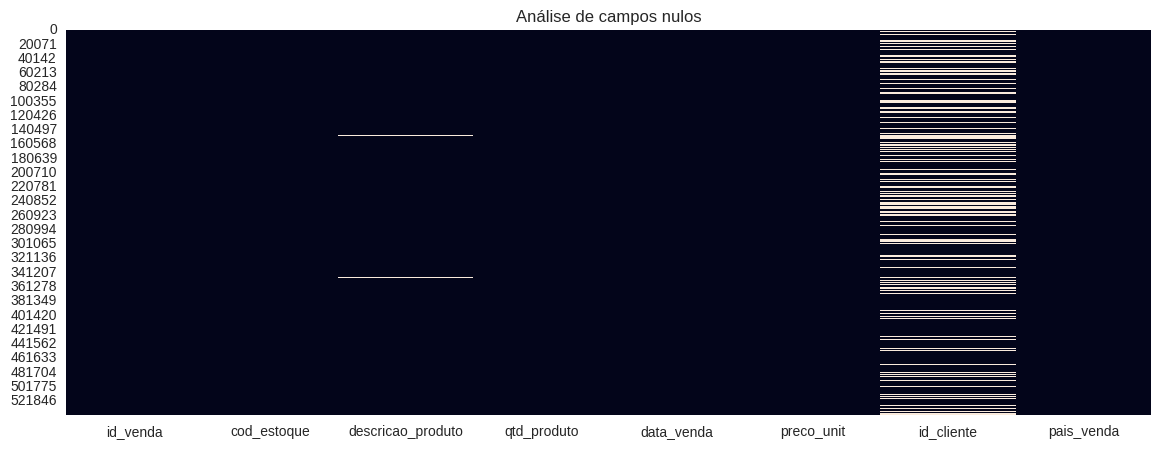

In [ ]:
# NULOS PLOT:

plt.figure( figsize=(14,5) )
plt.title('Análise de campos nulos')
sns.heatmap( df.isnull(), cbar=False );

In [ ]:
# JUNTANDOS INFORMAÇÕES SOBRE DADOS NULOS:

(
df.isna().sum().to_frame('Total_Nulos')
.join((df.isna().sum() / df.shape[0] * 100).to_frame('Percentual_Nulos'))
.sort_values('Total_Nulos', ascending=False)
)

,Total_Nulos,Percentual_Nulos
id_cliente,135080,24.926694
descricao_produto,1454,0.268311
id_venda,0,0.000000
cod_estoque,0,0.000000
qtd_produto,0,0.000000
data_venda,0,0.000000
preco_unit,0,0.000000
pais_venda,0,0.000000


In [ ]:
# EXCLUIR DADOS NULOS:

df = df.dropna()

In [ ]:
# DUPLICADOS:

df.duplicated().sum()

5225

In [ ]:
# DADOS UNICOS:

df.nunique()

id_venda             22190
cod_estoque           3684
descricao_produto     3896
qtd_produto            436
data_venda           20460
preco_unit             620
id_cliente            4372
pais_venda              37
dtype: int64

In [ ]:
# AJUSTAR COLUNA ID_VENDA QUE POSSUIA CARACTER C ANTES DE ALGUNS DADOS

df['id_venda'] = df['id_venda'].str.replace('C', '', regex=True)


In [ ]:
import datetime
from datetime import date

In [ ]:
# AJUSTAR TIPOS DE DADOS:

# id_cliente - INT
# id_venda - INT

df = df.astype({'id_cliente' : 'int64'})
df = df.astype({'id_venda' : 'int64'})

# data_venda  - DATETIME

df['data_venda'] = pd.to_datetime(df['data_venda'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id_venda           406829 non-null  int64         
 1   cod_estoque        406829 non-null  object        
 2   descricao_produto  406829 non-null  object        
 3   qtd_produto        406829 non-null  int64         
 4   data_venda         406829 non-null  datetime64[ns]
 5   preco_unit         406829 non-null  float64       
 6   id_cliente         406829 non-null  int64         
 7   pais_venda         406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 27.9+ MB


In [ ]:
# ESTATISTICAS BÁSICAS:

df.describe()

,id_venda,qtd_produto,preco_unit,id_cliente
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,560581.739372,12.061303,3.460471,15287.690570
std,13105.442708,248.693370,69.315162,1713.600303
min,536365.000000,-80995.000000,0.000000,12346.000000
25%,549130.000000,2.000000,1.250000,13953.000000
50%,561873.000000,5.000000,1.950000,15152.000000
75%,572065.000000,12.000000,3.750000,16791.000000
max,581587.000000,80995.000000,38970.000000,18287.000000


<Axes: >

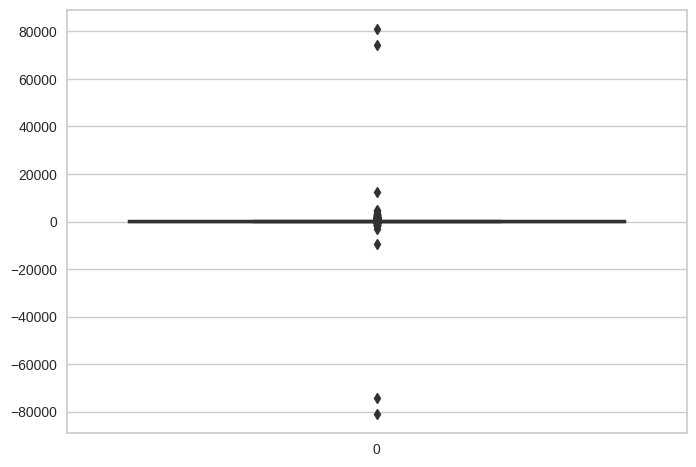

In [ ]:
# OUTLIERS:

sns.boxplot(data=df['qtd_produto'])

<Axes: >

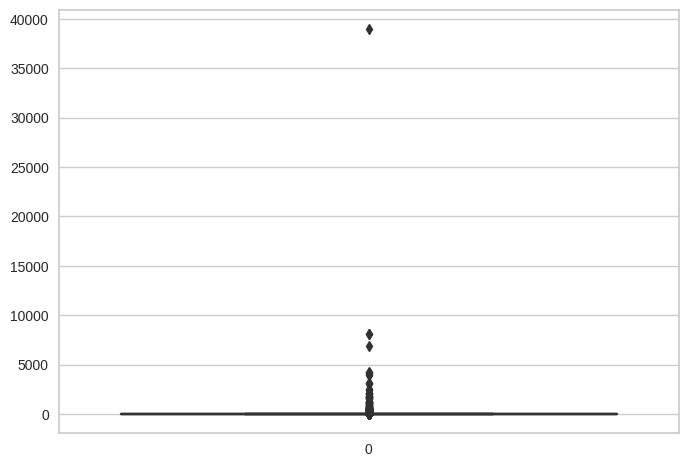

In [ ]:
sns.boxplot(data=df['preco_unit'])

In [ ]:
# EXCLUIR DADOS NEGATIVOS NA COLUNA qtd_produto e preco_unit:

df = df.query('qtd_produto > 0')
df = df.query('preco_unit > 0')

<Axes: >

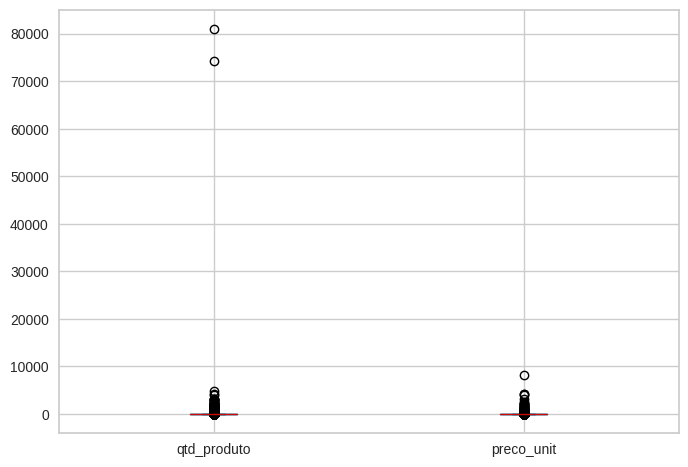

In [ ]:
# VERIFICAR OUTLIERS DAS COLUNAS qtd_produto E preco_unit:

df[['qtd_produto','preco_unit']].plot.box()

In [ ]:
# FILTRANDO VENDAS COM QUANTIDADES DE PRODUTOS ACIMA DE 10 000:

df.query('qtd_produto>10_000')

,id_venda,cod_estoque,descricao_produto,qtd_produto,data_venda,preco_unit,id_cliente,pais_venda
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


In [ ]:
# FILTRANDO VENDAS COM PREÇOS UNITÁRIOS DE PRODUTOS ACIMA DE 8 000:


df.query('preco_unit>8_000')

,id_venda,cod_estoque,descricao_produto,qtd_produto,data_venda,preco_unit,id_cliente,pais_venda
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom


In [ ]:
# EXCLUINDO OS 3 REGISTROS DE VENDAS COM OUTLIERS, PODEM INTERFERIR NO ALGORITMO:

df = df.query('qtd_produto<10_000 & preco_unit<8_000').copy()

<Axes: >

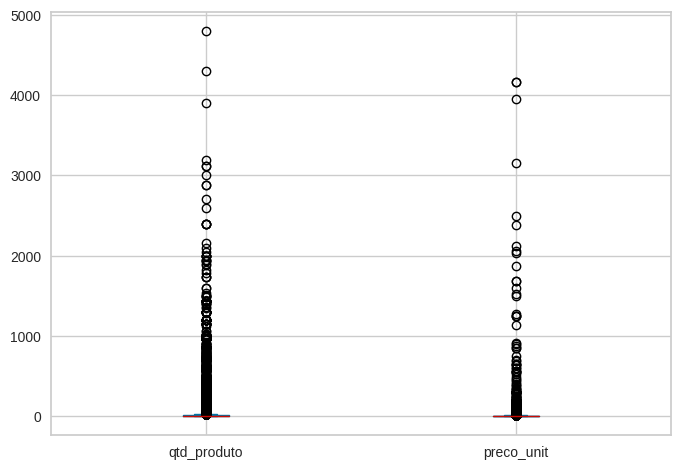

In [ ]:
df[['qtd_produto','preco_unit']].plot.box()

In [ ]:
# CRIAR COLUNA ADICIONAL COM O NOME "Valor_TotalCompra", UTILIZANDO "qtd_produto" e "preco_unit"

df["Valor_TotalCompra"] = df["qtd_produto"] * df["preco_unit"]
df.head()

,id_venda,cod_estoque,descricao_produto,qtd_produto,data_venda,preco_unit,id_cliente,pais_venda,Valor_TotalCompra
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# ANÁLISES QUE QUERO FAZER:

# total de vendas para ver mês e ano com maiores vendas:
# numero clientes por país:
# paises com maiores vendas:

In [ ]:
# CRIAR COLUNA PARA MÊS E COLUNA PARA ANO:

df['Mes'] = pd.DatetimeIndex(df['data_venda']).month
df['Ano'] = pd.DatetimeIndex(df['data_venda']).year

In [ ]:
df.head()

,id_venda,cod_estoque,descricao_produto,qtd_produto,data_venda,preco_unit,id_cliente,pais_venda,Valor_TotalCompra,Mes,Ano
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010


In [ ]:
# MÊS COM MAIORES VALORES EM VENDAS:

Analise_vendas_mes = df.groupby('Mes')['Valor_TotalCompra'].sum().sort_values(ascending=False)
Analise_vendas_mes.head()

Mes
11    1161817.380
10    1039318.790
9      952838.382
12     922437.080
5      670451.810
Name: Valor_TotalCompra, dtype: float64

<ipython-input-214-5253642fcba7>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x='Mes', y='Valor_TotalCompra', ci=None, color='#69b3a2', estimator=sum)


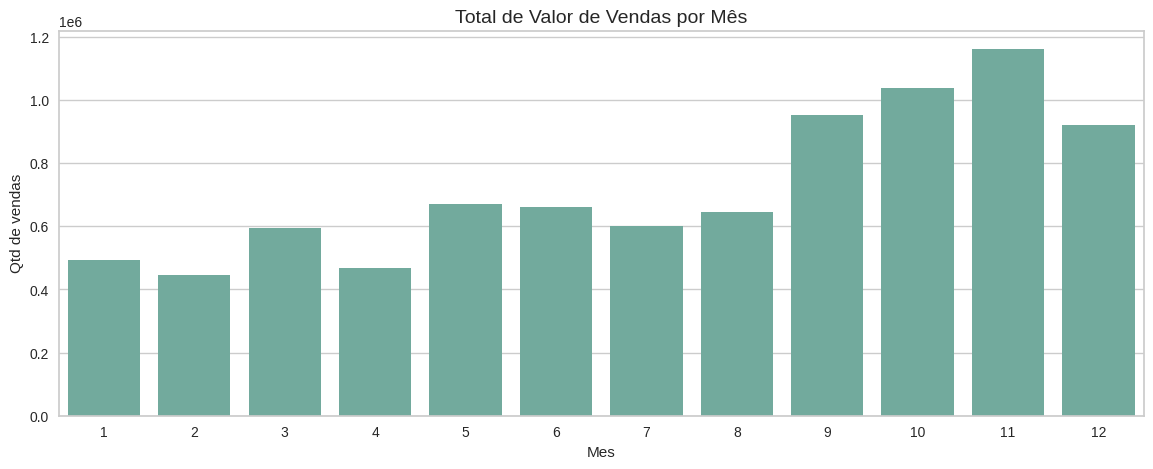

In [ ]:
plt.figure( figsize=(14, 5) )
plt.title('Total de Valor de Vendas por Mês', loc='center', fontsize=14)
sns.barplot(data = df, x='Mes', y='Valor_TotalCompra', ci=None, color='#69b3a2', estimator=sum)
plt.ylabel('Qtd de vendas');

In [ ]:
# MÊS COM MAIORES VENDAS:

Analise_NUMEROS_vendas_mes = df.groupby('Mes')['qtd_produto'].sum().sort_values(ascending=False)
Analise_NUMEROS_vendas_mes.head()

Mes
11    669051
10    593900
9     544897
12    518683
8     398121
Name: qtd_produto, dtype: int64

<ipython-input-216-61ab38283ef2>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x='Mes', y='qtd_produto', ci=None, color='#69b3a2', estimator=sum)


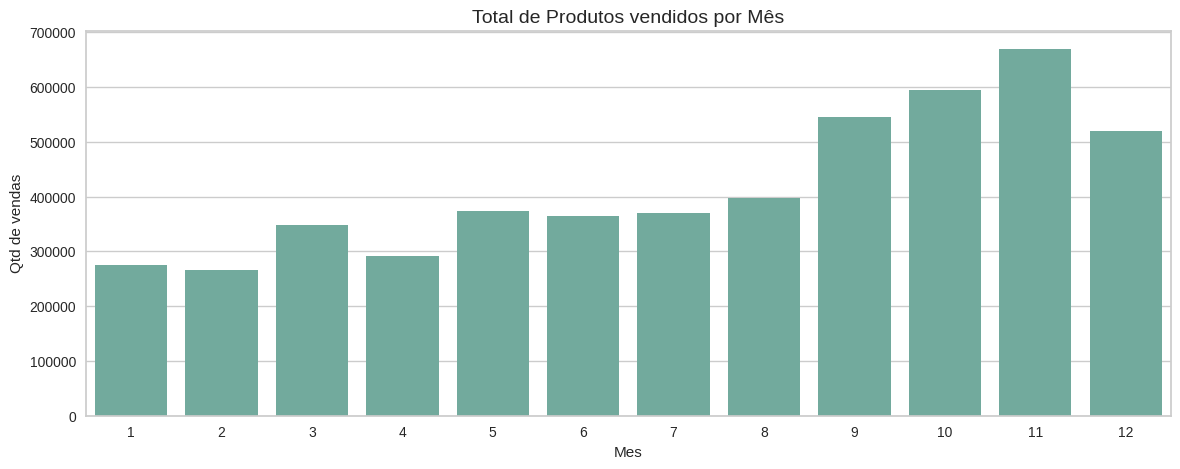

In [ ]:
plt.figure( figsize=(14, 5) )
plt.title('Total de Produtos vendidos por Mês', loc='center', fontsize=14)
sns.barplot(data = df, x='Mes', y='qtd_produto', ci=None, color='#69b3a2', estimator=sum)
plt.ylabel('Qtd de vendas');

In [ ]:
# ANO COM MAIORES VENDAS:

Analise_vendas_ano = df.groupby('Ano')['Valor_TotalCompra'].sum().sort_values(ascending=False)
Analise_vendas_ano.head()

Ano
2011    8084898.064
2010     572713.890
Name: Valor_TotalCompra, dtype: float64

<ipython-input-218-caeebdcaf2c4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x='Ano', y='Valor_TotalCompra', ci=None, color='#69b3a2', estimator=sum)


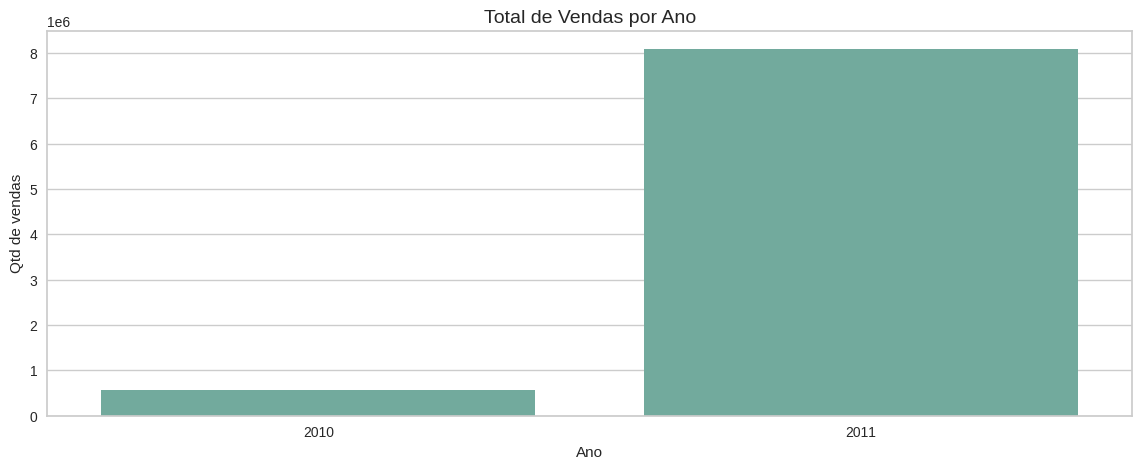

In [ ]:
plt.figure( figsize=(14, 5) )
plt.title('Total de Vendas por Ano', loc='center', fontsize=14)
sns.barplot(data = df, x='Ano', y='Valor_TotalCompra', ci=None, color='#69b3a2', estimator=sum)
plt.ylabel('Qtd de vendas');

In [ ]:
# CONTAR NUMERO CLIENTES REGISTRADOS POR PAÍS:

Analise_cliente_pais = df['pais_venda'].value_counts().nlargest(10)
Analise_cliente_pais.head()

United Kingdom    354318
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: pais_venda, dtype: int64

In [ ]:
# CONTAR NUMERO CLIENTES REGISTRADOS POR PAÍS:, EM PERCENTUAL:

Analise_clientes_pais_perc = df['pais_venda'].value_counts(normalize = True)

Analise_clientes_pais_perc.head()

# 89% DOS CLIENTES REGISTRADOS SÃO DA INGLATERRA

United Kingdom    0.890512
Germany           0.022720
France            0.020964
EIRE              0.018186
Spain             0.006243
Name: pais_venda, dtype: float64

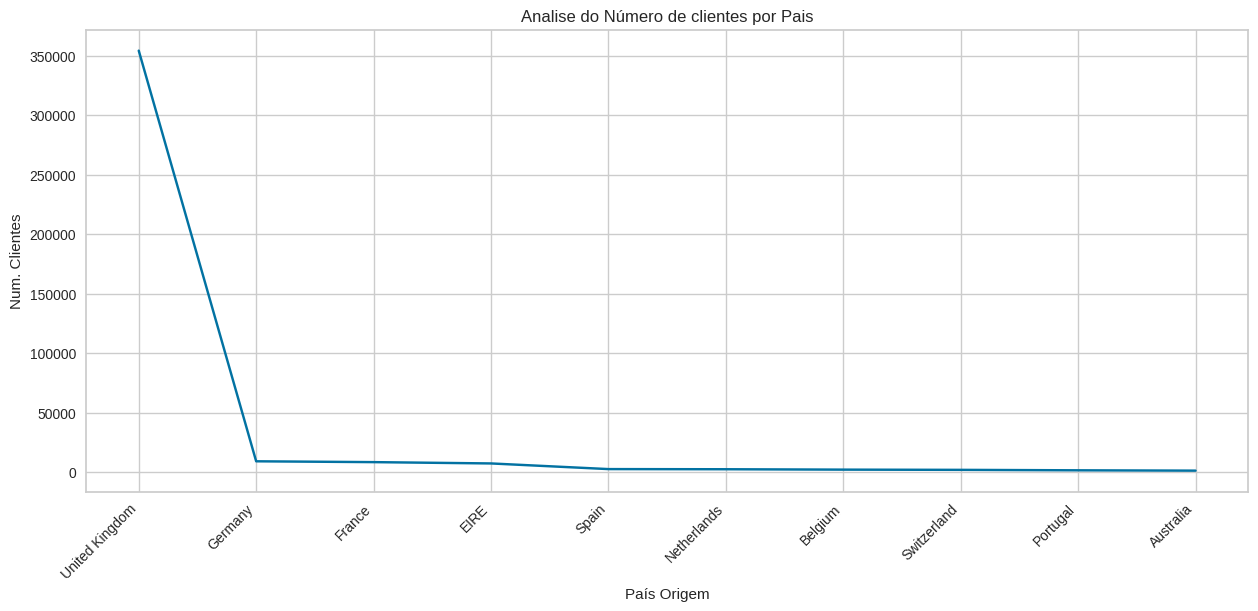

In [ ]:
plt.figure( figsize=(15,6) )
plt.plot( Analise_cliente_pais)
plt.title('Analise do Número de clientes por Pais')
plt.xlabel('País Origem')
plt.ylabel('Num. Clientes')
plt.xticks( rotation=45, ha='right');

In [ ]:
# CONTAR VALOR DE VENDAS POR PAÍS:

Analise_vendas_pais = df.groupby('pais_venda')['Valor_TotalCompra'].sum().nlargest(10).sort_values(ascending=False)
Analise_vendas_pais.head()


pais_venda
United Kingdom    7054595.604
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Name: Valor_TotalCompra, dtype: float64

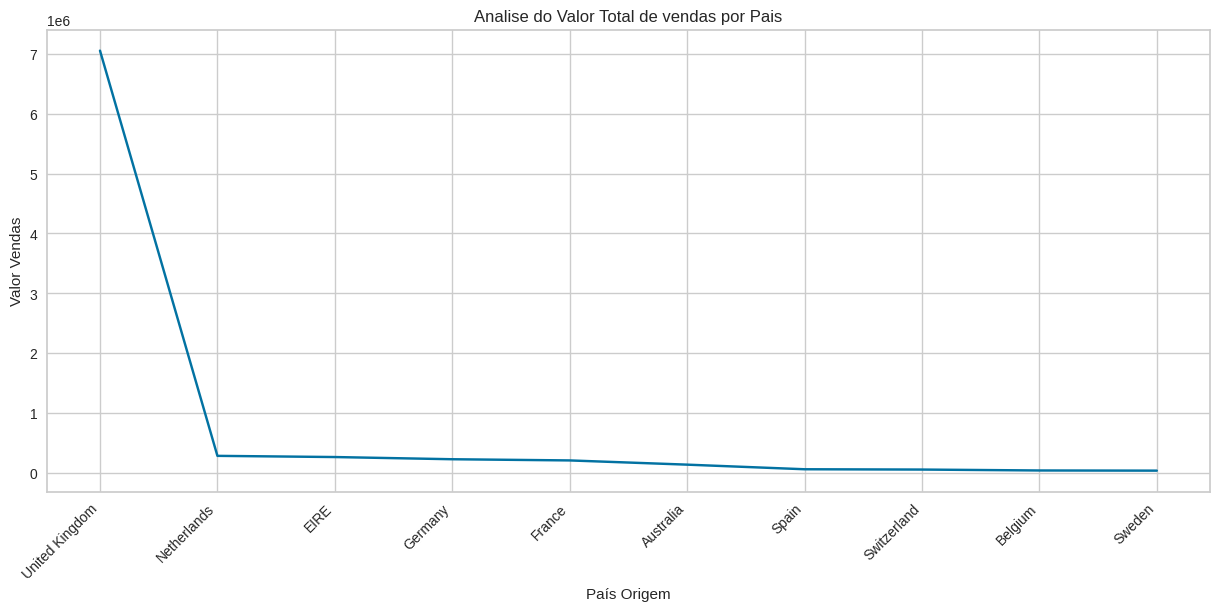

In [ ]:
plt.figure( figsize=(15,6) )
plt.plot( Analise_vendas_pais)
plt.title('Analise do Valor Total de vendas por Pais')
plt.xlabel('País Origem')
plt.ylabel('Valor Vendas')
plt.xticks( rotation=45, ha='right');

<ipython-input-225-33814b41c28b>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-225-33814b41c28b>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(Linhas, Colunas, 1)


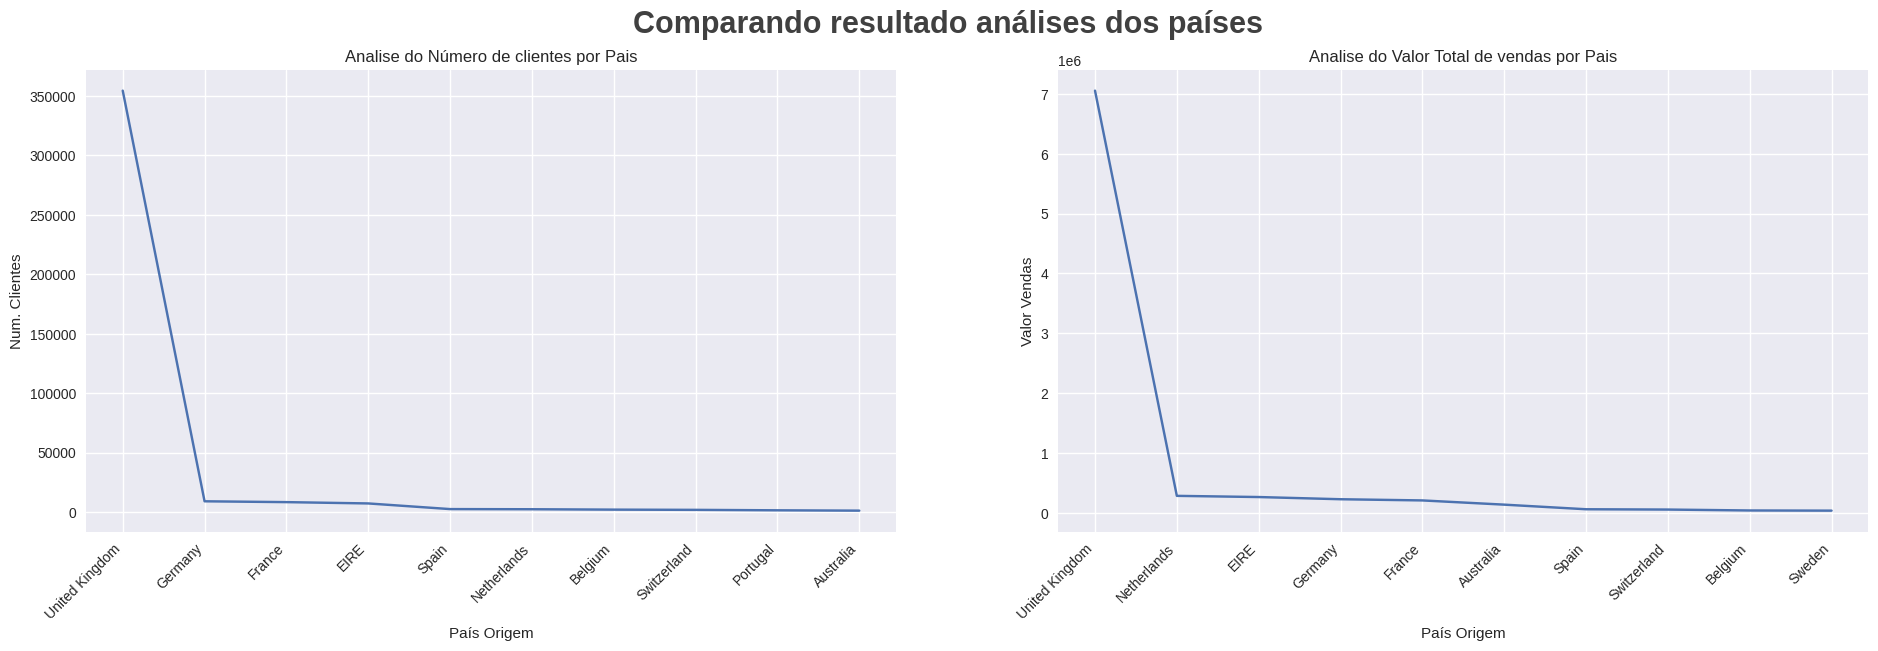

In [ ]:
# COMPARANDO RESULTADO POR PAÍSES:

fig, ax = plt.subplots(figsize=(23,6))
plt.style.use('seaborn')
plt.suptitle('Comparando resultado análises dos países', fontsize=22, color='#404040', fontweight=600)
Linhas = 1
Colunas = 2

# ACESSANDO O GRÁFICO 1:
plt.subplot(Linhas, Colunas, 1)
plt.plot( Analise_cliente_pais)
plt.title('Analise do Número de clientes por Pais')
plt.xlabel('País Origem')
plt.ylabel('Num. Clientes')
plt.xticks( rotation=45, ha='right');

# ACESSANDO O GRÁFICO 2:
plt.subplot(Linhas, Colunas, 2)
plt.plot( Analise_vendas_pais)
plt.title('Analise do Valor Total de vendas por Pais')
plt.xlabel('País Origem')
plt.ylabel('Valor Vendas')
plt.xticks( rotation=45, ha='right');


<ipython-input-226-fa7f89097728>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-226-fa7f89097728>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(Linhas, Colunas, 1)
<ipython-input-226-fa7f89097728>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x='Mes', y='Valor_TotalCompra', ci=None, color='#69b3a2', estimator=sum)
<ipython-input-226-fa7f89097728>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x='Mes', y='qtd_produto', ci=None, 

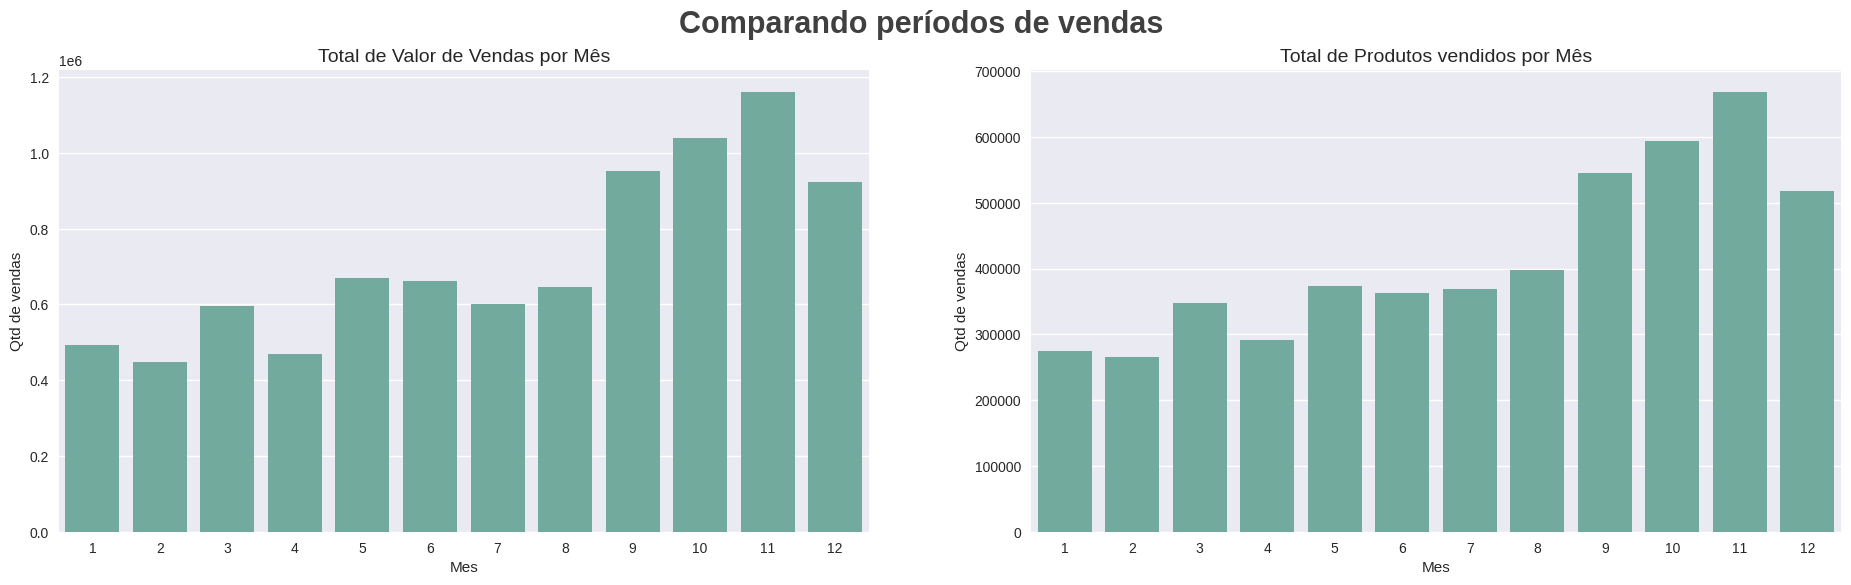

In [ ]:
# COMPARANDO RESULTADO POR PERÍODOS DE VENDAS:

fig, ax = plt.subplots(figsize=(23,6))
plt.style.use('seaborn')
plt.suptitle('Comparando períodos de vendas', fontsize=22, color='#404040', fontweight=600)
Linhas = 1
Colunas = 2

# ACESSANDO O GRÁFICO 1:
plt.subplot(Linhas, Colunas, 1)
plt.title('Total de Valor de Vendas por Mês', loc='center', fontsize=14)
sns.barplot(data = df, x='Mes', y='Valor_TotalCompra', ci=None, color='#69b3a2', estimator=sum)
plt.ylabel('Qtd de vendas');

# ACESSANDO O GRÁFICO 2:
plt.subplot(Linhas, Colunas, 2)
plt.title('Total de Produtos vendidos por Mês', loc='center', fontsize=14)
sns.barplot(data = df, x='Mes', y='qtd_produto', ci=None, color='#69b3a2', estimator=sum)
plt.ylabel('Qtd de vendas');

- RFM

In [ ]:
# R é a recência, diferença em dias da última compra do cliente e da última compra disponível no conjunto de dados.
# F é a frequência, ou seja, a quantidade de compras feitas pelo cliente.
# M é o ticket médio, ou seja, a média das compras feitas pelo cliente.

In [ ]:
df.head()

,id_venda,cod_estoque,descricao_produto,qtd_produto,data_venda,preco_unit,id_cliente,pais_venda,Valor_TotalCompra,Mes,Ano
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010


In [ ]:
pd.Timestamp.today()

Timestamp('2023-09-18 12:55:52.328973')

In [ ]:
pd.Timestamp('2012-01-01')

Timestamp('2012-01-01 00:00:00')

In [ ]:
df_rfm = (
  df.groupby('id_cliente')
  .agg(
      R = ('data_venda', lambda x: (pd.Timestamp('2012-01-01') - x.max()).days),
      F = ('id_venda', 'nunique'),
      M = ('Valor_TotalCompra', 'mean')
  )
)

df_rfm

,R,F,M
id_cliente,,,
12347,24,7,23.681319
12348,97,4,57.975484
12349,40,1,24.076027
12350,332,1,19.670588
12352,58,8,29.482824
...,...,...,...
18280,299,1,18.060000
18281,202,1,11.545714
18282,29,2,14.837500


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, scale

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from yellowbrick.cluster import kelbow_visualizer

<Axes: >

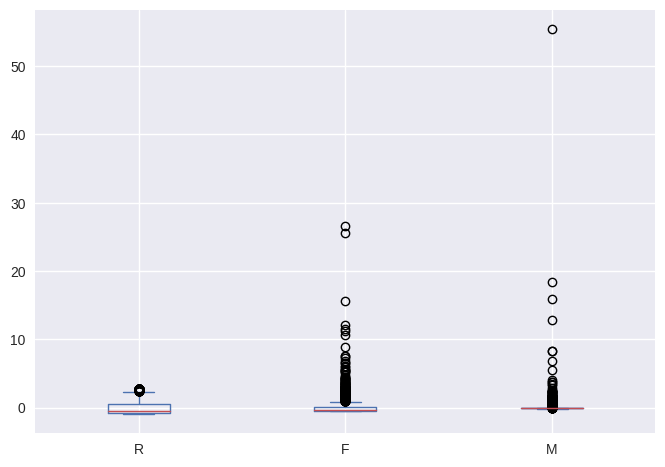

In [ ]:
# PLOTANDO VALORES OUTLIERS DO RFM:

df_rfm.apply(scale).plot.box()

# em M tenho mais de 50 desvios padrão, posso excluir esses para não influenciar no meu algoritmo

In [ ]:
# VERIFICAR QUAL CLIENTE QUE ESTÁ COM ESSES VALORES FORA DO DESVIO PADRÃO:

df_rfm.apply(scale).query('M>50')

,R,F,M
id_cliente,,,
15098,0.899878,-0.165317,55.434876


In [ ]:
df.query('id_cliente==15098')

,id_venda,cod_estoque,descricao_produto,qtd_produto,data_venda,preco_unit,id_cliente,pais_venda,Valor_TotalCompra,Mes,Ano
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098,United Kingdom,297.0,6,2011
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0,6,2011
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098,United Kingdom,649.5,6,2011


In [ ]:
# EXCLUIR ESSE CLIENTE:

df_rfm = df_rfm.drop(15098)

<Axes: >

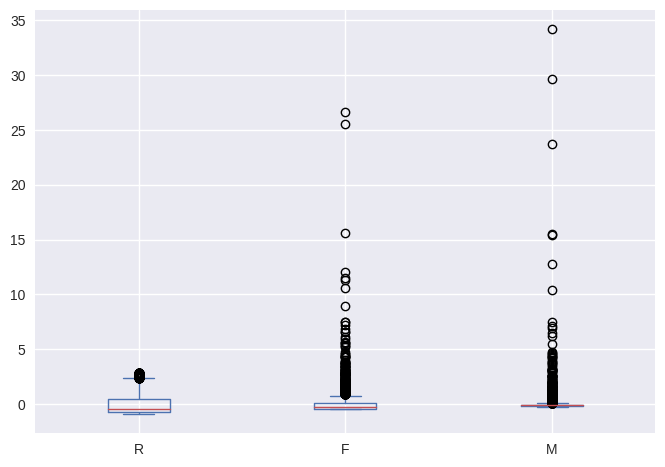

In [ ]:
df_rfm.apply(scale).plot.box()

In [ ]:
# FAZER UMA NORMALIZAÇÃO DESSES VALORES, PARA NÃO FICAREM LONGES UNS DOS OUTROS, DEIXANDO A MÉDIA EM ZERO E O DESVIO PADRÃO EM 1:

from sklearn.preprocessing import PowerTransformer

In [ ]:
scaler = PowerTransformer()

In [ ]:
df_rfm_scaled = pd.DataFrame(scaler.fit_transform(df_rfm), index=df_rfm.index, columns=df_rfm.columns)
df_rfm_scaled

,R,F,M
id_cliente,,,
12347,-1.563219,1.201866,0.407836
12348,0.323470,0.660670,1.329304
12349,-0.809134,-1.158070,0.426829
12350,1.568467,-1.158070,0.189376
12352,-0.307718,1.309671,0.653411
...,...,...,...
18280,1.475652,-1.158070,0.085562
18281,1.107356,-1.158070,-0.491003
18282,-1.275046,-0.195707,-0.161007


<Axes: >

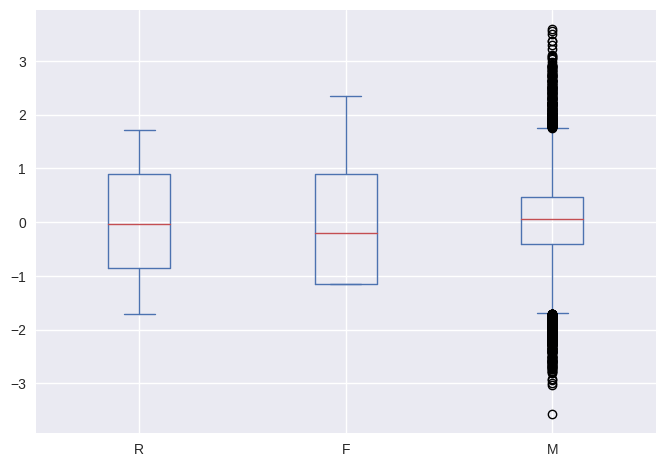

In [ ]:
# PLOTAR BOXPLOT COM DADOS NORMALIZADOS:

df_rfm_scaled.plot.box()

In [ ]:
df_rfm.describe()

,R,F,M
count,4336.000000,4336.000000,4336.000000
mean,114.032288,4.272601,34.554185
std,99.968352,7.697927,129.202663
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.715999
75%,163.250000,5.000000,24.843993
max,395.000000,209.000000,4453.430000


In [ ]:
df_rfm_clip = df_rfm.apply(lambda x: x.clip(upper=x.quantile(.95))) # VALORES SUPERIORES MÁXIMO PODE SER O SEU QUARTIL DE 95%

# COM ESSE COMANDO, ESTAMOS LIMITANDO O VALOR MÁXIMO DE CADA VARIÁVEL COM BASE NA DISTRIBUIÇÃO DA SUA PRÓPRIA VARIÁVEL

df_rfm_clip.describe()

,R,F,M
count,4336.000000,4336.000000,4336.000000
mean,112.248155,3.608164,23.634656
std,95.504576,3.358999,20.993635
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.715999
75%,163.250000,5.000000,24.843993
max,333.000000,13.000000,91.768421


In [ ]:
# PADRONIZAR/NORMALIZAR VARIÁVEIS

df_rfm_clip_scaled = df_rfm_clip.apply(scale)

## MODELING & MODEL EVALUATION

- K-MEANS:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

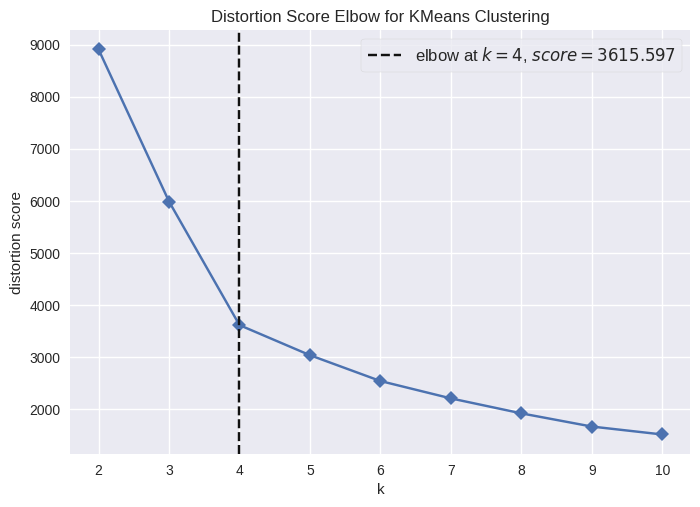

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [ ]:
# DESCOBRIR MELHOR K, UTILIZANDO O MÉTODO DO COTOVELO:

# DATASET A SER UTILIZADO: df_rfm_clip_scaled, JÁ ESTÁ TRATADO E ESCALADO PARA UTILIZAR OS ALGORITMOS

kelbow_visualizer(KMeans(), df_rfm_clip_scaled, k=10, timings=False)

# PELO MÉTODO DO COTOVELO, O IDEAL É UTILIZARMOS K=4

In [ ]:
# DESCOBRIR MELHOR K, UTILIZANDO AS MÉTRICAS:

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfm_clip_scaled.copy()

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

# TAMBÉM PELAS MÉTRICAS, O MELHOR K É IGUAL A 4
# MÉTRICA davies_bouldin_score, o melhor é sempre o maix baixo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,8906.589803,0.382311,1.065369,1995.770793
3,5987.858046,0.434196,0.858749,2539.996344
4,3615.604890,0.479553,0.704462,3751.144746
5,3038.351886,0.484991,0.737341,3552.793389
6,2542.498169,0.398087,0.851009,3564.654984
7,2209.186985,0.376864,0.870175,3526.795460
8,1907.066277,0.383598,0.862066,3599.016667
9,1668.785587,0.394119,0.800873,3675.190014
10,1516.641890,0.351595,0.887744,3641.963320


In [ ]:
# APLICAR O ALGORITMO KMEANS, COM 4 CLUSTERS:

kmeans = KMeans(4)
kmeans_labels = kmeans.fit_predict(df_rfm_clip_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# PLOTAR O GRÁFICO 3D DOS 4 CLUSTERS:

import plotly.express as px

px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=kmeans_labels.astype(str), template='plotly_dark')

# PODEMOS VER 4 GRUPOS DISTINTOS DE CLIENTES, MAIOR M É O GRUPO VERMELHO, MAIOR R É O GRUPO ROXO, MAIOR F É O GRUPO AZUL, E O GRUPO VERDE  POSSUI ÍNDICES BAIXOS DE M, R E F.

- HIERARCHICAL CLUSTERING:

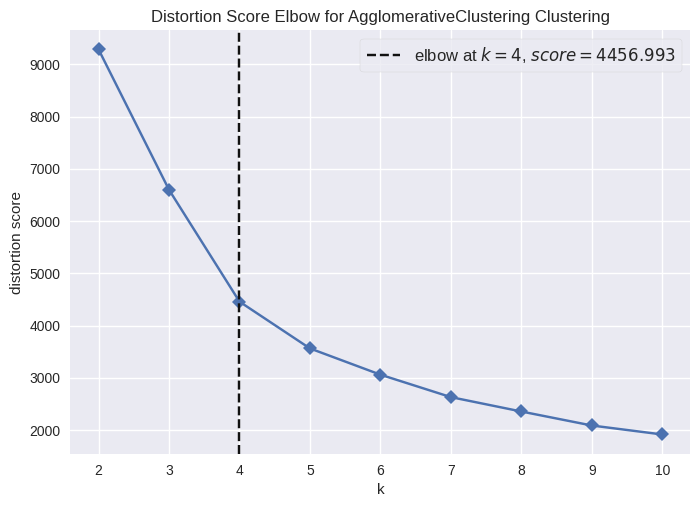

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=10),
                 timings=False)

In [ ]:
# DESCOBRIR MELHOR K, UTILIZANDO O MÉTODO DO COTOVELO:

kelbow_visualizer(AgglomerativeClustering(), df_rfm_clip_scaled, k=10, timings=False)

# PELO MÉTODO DO COTOVELO, O IDEAL É UTILIZARMOS K=4

In [ ]:
# DESCOBRIR MELHOR K, UTILIZANDO AS MÉTRICAS:

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfm_clip_scaled.copy()

for k in range(2,11):
  model = AgglomerativeClustering(n_clusters=k)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

# PELAS MÉTRICAS, O IDEAL É UTILIZARMOS K=4 TAMBÉM.

,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,
2,0.361292,1.331666,1737.623791
3,0.398928,0.869855,2104.783905
4,0.431886,0.761966,2770.399918
5,0.342136,0.897329,2872.239315
6,0.348298,0.791909,2816.854970
7,0.322680,0.844326,2848.491623
8,0.287643,0.967432,2799.001327
9,0.286883,0.976982,2832.797336
10,0.298923,0.953087,2786.657350


In [ ]:
# APLICAR O ALGORITMO HIERARCHICAL CLUSTERING, COM 4 CLUSTERS:

hclust = AgglomerativeClustering(n_clusters=4)
hclust_labels = hclust.fit_predict(df_rfm_clip_scaled)

In [ ]:
# PLOTAR O GRÁFICO 3D DOS 4 CLUSTERS:

px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=hclust_labels.astype(str), template='plotly_dark')

# PODEMOS VER 4 GRUPOS DISTINTOS DE CLIENTES, MEDIDAS MUITO PARECIDAS COM O MODELO K-MEANS.

* GAUSSIAN MIXTURE:

In [ ]:
# DESCOBRIR MELHOR K E MELHOR MODELO DE TIPOS DE COVARIANCIA:

results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']
X = df_rfm_clip_scaled.copy()

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, n_init=10, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({
      'bic': mclust.bic(X),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results.sort_values('bic').head()

,bic,n_components,covariance_type
28,-47.636754,8,full
30,-8.519870,8,diag
26,212.991985,7,diag
24,2076.885277,7,full
20,9370.808830,6,full


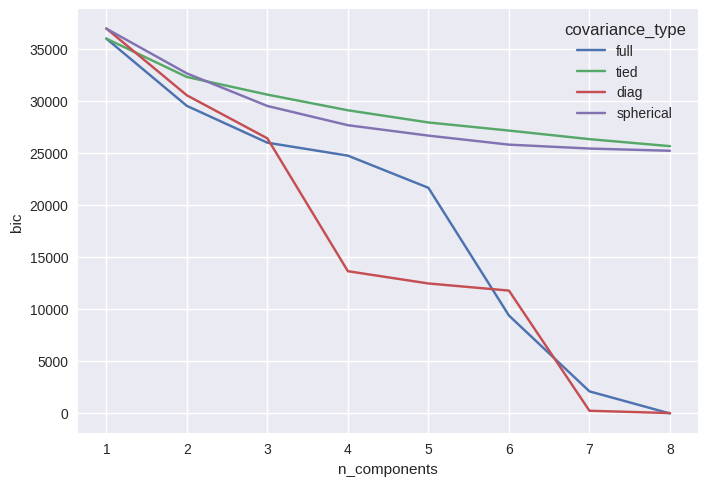

In [ ]:
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type');

In [ ]:
# UTILIZAR 5 CLUSTER, POIS ACIMA DISSO OS GRUPOS FICAM MUITO DISPERSOS:

mclust = GaussianMixture(n_components=5, covariance_type='full', n_init=10)
mclust_labels = mclust.fit_predict(df_rfm_clip_scaled)

In [ ]:
px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=mclust_labels.astype(str), template='plotly_dark')

# **INTERPRETAÇÃO DOS CLUSTERS:**

In [ ]:
# UTILIZAR K-MEANS: MODELO QUE MELHOR PERFORMOU, QUE MOSTROU OS CLUSTERS BEM DIVIDIDOS E DE FORMA CLARA PARA SE VISUALIZAR E ANALISAR.


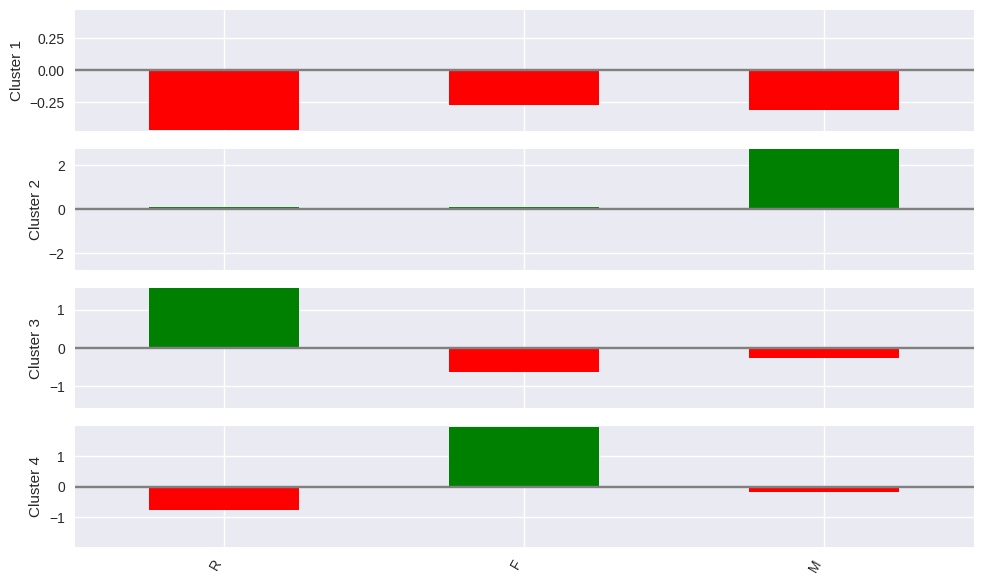

In [ ]:
# VISUALIZAR OS CENTROIDES:
# PLOTAR OS CLUSTER LEVANDO EM CONSIDERAÇÃO VALORES DE R, F E M:

centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_rfm_clip_scaled.columns)

fig,axes = plt.subplots(nrows=4, figsize=(10,6), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
 # OUTRO MODO DE VISUALIZAR AS CARACTERISTICAS DE CADA CLUSTER:
(
  df_rfm_clip_scaled.assign(cluster=kmeans_labels)
  .groupby('cluster')
  .mean()
  .transpose()
  .style.background_gradient(cmap='YlOrRd', axis=1)
)

cluster,0,1,2,3
R,-0.468355,0.092255,1.558575,-0.740690
F,-0.269244,0.079917,-0.624788,1.960061
M,-0.310337,2.719206,-0.263466,-0.152811


In [ ]:
# DESCRIÇÃO DOS CLUSTERS PÓS PLOTAGEM:

# - CLUSTER 1: TEM TICKET MÉDIO E FREQUENCIA BAIXOS, PORÉM RESCENCIA MUITO BAIXA TAMBÉM, ISSO INDICA QUE PROVAVELMENTE É UM GRUPO DE NOVOS CLIENTES.
# - CLUSTER 2: TEM UMA FREQUENCIA E RESCENCIA BAIXOS, PORÉM UM TICKET MÉDIO BEM ALTO, INDICANDO CLIENTES QUE NÃO COMPRAM COM FREQUENCIA, PORÉM COMPRAM PRODUTOS MAIS CAROS.
# - CLUSTER 3: RESCENCIA MUITO ALTA, FREQUENCIA E TICKET MÉDIO BAIXO, ISSO PODE NOS INDICAR UM GRUPO DE CLIENTES CHURN, QUE NÃO COMPRAM HÁ MAIS TEMPO.
# - CLUSTER 4: RESCENCIA E TICKET MÉDIO BAIXO, PORÉM FREQUENCIA MÉDIA, CLIENTES QUE COMPRAM REGULARMENTE, PORÉM COMPRAM PRODUTOS MAIS EM CONTA.

# TICKET MÉDIO ALTO = BOM
# FREQUENCIA ALTA = BOM
# RESCENCIA ALTA= RUIM

In [ ]:
# ANÁLISE:
# UTILIZANDO O MODELO DE CLUSTERIZAÇÃO K-MEANS, QUE MELHOR PERFORMOU, FOI POSSÍVEL VISUALIZAR DE FORMA MAIS CLARA 4 GRUPOS DIFERENTES DE CLIENTES PARA A EMPRESA. ESSES 4 GRUPOS FORAM SEPARADOS LEVANDO EM CONSIDERAÇÃO:
# - A RESCENCIA DE COMPRAS, OU SEJA, HÁ QUANTOS DIAS FOI A ÚLTIMA COMPRA DESSES CLIENTES:
# - A FREQUENCIA DE COMPRAS, QUE INDICA QUANTAS VEZES ESSE CLIENTE COMPROU EM UM DETERMINADO PERIODO DE TEMPO:
# - O TICHET MÉDIO, QUE INDICA O VALOR MÉDIO DAS COMPRAS DESSE CLIENTE.

# CLIENTES DO CLUSTER 1 E 2 PODEMOS UTILIZAR MEIOS DE FIDELIZAÇÃO E ATÉ MESMO RECOMPENSAS, POIS SÃO OS CLIENTES QUE COMPRAM PRODUTOS COM MAIORES VALORES E NOVOS CLIENTES, QUE ESTEJAM INICIANDO SUAS COMPRAS COM A EMPRESA.
# CLIENTES DO CLUSTER 3 PODEMOS UTILIZAR CAMPANHAS E PROMOÇÕES PARA TENTAR RECONQUISTAR, POIS SUAS CARACTERÍSTICAS INDICAM QUE SÃO CLIENTES CHURN.
# CLIENTES DO CLUSTER 4 SÃO CLIENTES QUE COMPRAM COM FREQUENCIA, PORÉM PRODUTOS MAIS EM CONTA, PRECISANDO DE CAMPANHAS E SUPORTE PARA CONQUISTAR E SE MANTER NA CARTA DE CLIENTES DA EMPRESA.